Practice 6

In [1]:
import YData 


#### Download Practice 6 Jupyter Notebook ####  
#YData.download_practice_code(6)           # Without Answers. 
#YData.download_practice_code(6, True)     # With Answers. (Won't work until Friday eve.)



#### Download Data #### 
YData.download_data("apple_2025.csv")
YData.download_data("google_2025.csv")
YData.download.download_data("States_shapefile.geojson")
YData.download.download_data("state_demographics.csv")



#### Import Packages #### 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 



<br>
<br>
<br>

## Choropleth Maps - Bachelors Degree

Let's first do a practice problem of creating a choropleth map of the percentage of people who have bachelors degree in each state. 

Data with the state boundaries and the demographic information are loaded below. Please do the following steps:

1. Join/merge the map data with the demographic data to create a new geoDataFrame called `state_map_demo`.
2. Create a new column in `state_map_demo` called `with_bachelors` that has the percentage of people with bachelors (i.e., we are normalizing our choropleth map).
3. Plot the choropleth showing the percentage with bachelors. Does this map look like you would expect? 


In [2]:
import geopandas as gpd

# The state boundaries data
state_map = gpd.read_file("States_shapefile.geojson")
print(state_map.crs)
state_map.head(3)

EPSG:4326


,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.9807, -85.11515 31.9074..."
1,2,,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."


In [3]:
# The state demographic information 
state_demographics = pd.read_csv("state_demographics.csv")
state_demographics["State"] = state_demographics["State"].apply(str.upper)
state_demographics.head(3)

,State,under_5,over_64,bachelors_degree,total
0,ALABAMA,295811.997,741954.681,1095959.202,4849377
1,ALASKA,54518.168,69252.808,202601.300,736732
2,ARIZONA,430814.976,1070305.956,1810769.196,6731484


In [4]:
# Join/merge the state map with the state demographic data

state_map_demo = state_map.merge(state_demographics, 
                                 left_on = "State_Name", right_on = "State", how = "left")

In [5]:
# Add a new column called "with_bachelors" to "normalize your map"

state_map_demo["with_bachelors"] = 100 * state_map_demo["bachelors_degree"]/state_map_demo["total"]


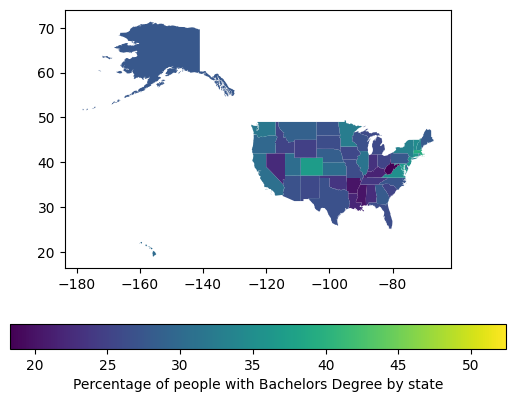

In [6]:
# Plot the choropleth map

state_map_demo.plot(column = "with_bachelors", cmap='viridis', legend = True,
                   legend_kwds={'label': "Percentage of people with Bachelors Degree by state",
                        'orientation': "horizontal"});


<br>
<br>
<br>
<br
<br>
<br>
<br>
<br>

# **For Loops in Python**

In [3]:
# Generic Syntax. (Don't run this cell.)

for {iteration variable} in {iterable}:
           # do things

- Each for loop starts with the keyword `for`.

- The `iteration variable` is a variable that is declared only in the scope of the loop that is used to 'point' at the elements in the sequence.

- The `iterable` is a data structure that contains the sequence of elements we are going to perform tasks on, for example a list or a dictionary. 

<br>
<br>

### 1. Some Skills Builder Exercises

In [7]:
# 1.A 
# Loop over items in a list.
# Write a for loop to print every element of a_list. 

a_list = ["first", "second", "third", "forth"]

for item in a_list:
    print(item)



first
second
third
forth


In [8]:
# 1.B
# Loop over every other item in the list.
# Write a for loop to print every other element of a_list. 

a_list = ["first", "second", "third", "forth"]

for item in a_list[::2]:
    print(item)


first
third


<br>


**Remark: When you call range, its value is not a list nor sequence of numbers. Loosely speaking, `range()` saves the instruction to iterate over a range of numbers. For example, `range(5)` defines the instruction to iterate over the first 5 numbers (starting at 0). That is why, used in a loop, it seems as if it is iterating over a list.**

In [9]:
# 1.C
# Loop over mulptiples of 3 (from 0 through 10) using the range() function.
# Write a for loop to print all the multiples of 3 from 0 through 10.


for i in range(0,10)[::3]:
    print(i)



    


0
3
6
9


In [10]:
# 1.D
# Can you print every other square of the numbers from 1 to 6? 

for i in range(0,10)[::3]:
    print(i)


0
3
6
9


In [11]:
# 1.E
# Create a list that has square roots of numbers from 1 through 10. 
# hint: the .append() method will be useful.

sqrt = []

for i in range(1, 11):
    
    sqrt.append(i** (1/2))


sqrt

[1.0,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 2.23606797749979,
 2.449489742783178,
 2.6457513110645907,
 2.8284271247461903,
 3.0,
 3.1622776601683795]

In [12]:
# 1.F
# Compute sum squares of numbers from 1 to 10.
my_sum = 0

for i in range(1, 11):
    my_sum = my_sum + (i ** 2)

my_sum






385

<br>
<br>
<br>


### 2. The Enumerate function

**The `enumerate()` function adds a counter to each item in a list or other iterable. It turns the iterable into something we can loop through, where each item comes with its number/index (starting from 0 by default).**

In [13]:
# Example 2.A
# We can use enumerate(my_list) to get both values from a list and sequential index numbers.


a_list = ["first", "second", "third", "forth"]

for index, curr_val in enumerate(a_list):
    print(str(index)  + " " + curr_val)


0 first
1 second
2 third
3 forth


In [14]:
# Example 2.B

b_list = ["I", "love", "YData"]

# Iterating list using enumerate to get both index and element.
for i, name in enumerate(b_list):
    print(f"Index {i}: {name}")

Index 0: I
Index 1: love
Index 2: YData


<br>

**Question 2.C**: Explain (in about two lines or so) the Python code in Examples 2.A and 2.B, and what it accomplishes?

Answer: ....


<br>
<br>
<br>

### 3. The zip function

**The `zip()` function in Python is a built-in function that aggregates elements from multiple iterables (such as lists, tuples, or strings) and returns an iterator of tuples. Each tuple contains elements from the input iterables at the same corresponding position.** 

In [15]:
# Example 3.A
# Zip example from class. 
list_1 = ["a", "b", "c"]
list_2 = ["x", "y", "z"]

for item1, item2 in zip(list_1, list_2):
    print(item1, item2)


a x
b y
c z


**Question 3.B**: Explain (in about two lines or so) the Python code in Example 3.A and what it accomplishes?

Answer: ....


In [17]:
# Question 3.C
# Use the zip function to print the same output as in Example 2.A above.  

c_list = ["0", "1", "2", "3"]

for i, j in zip(c_list, a_list):
    print(i,j)

0 first
1 second
2 third
3 forth


<br>
<br>
<br>

### 4. An Application: For loops

The code below extracts closing prices of Google and Apple stocks for Jan 01 through Sep 30. Please use for loops to create a list called `daily_diff` that has the `Google closing price - Apple closing price` for each day.

***There are a few ways to do this, so see if you can come up with a solution that works. Try to do this without using numpy, and once you have a solution, see if you can get the same result using numpy.***  



In [18]:
apple = pd.read_csv("apple_2025.csv")
google = pd.read_csv("google_2025.csv")

apple_close = apple["Close"].to_list()
google_close = google["Close"].to_list()


**1. First way to solve the problem without using the zip function and numpy.**

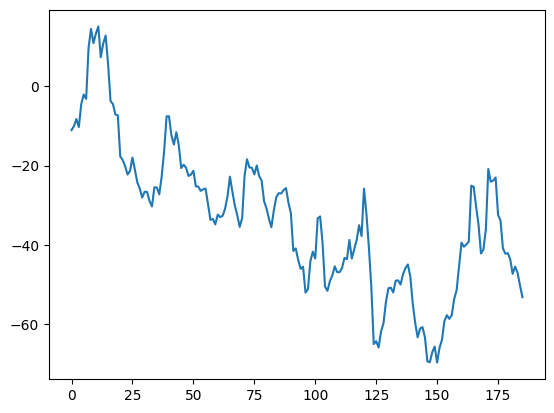

In [20]:
# Start with an empty list.
daily_diff = [];




# Use a for loop to add the closing price for each day to the list "daily_list".
for i in range(len(google_close)):

    google = google_close[i]
    apple = apple_close[i]
    daily_diff.append(google - apple)



# Plot daily differences.

plt.plot(daily_diff);


**2. Alternative solution using the zip function.**

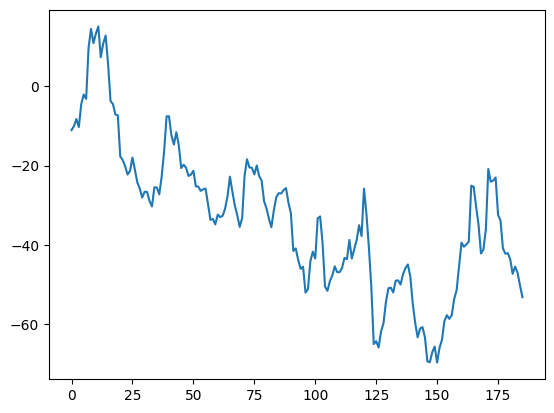

In [21]:
# Start with an empty list.
daily_diff2 = [];




# Use a for loop (along with the zip function) to add the closing price for each to the list "daily_list2".
for i, j in zip(google_close, apple_close):

    daily_diff2.append(i - j)



# Plot daily differences.
plt.plot(daily_diff2);



<br>
<br>
<br>

##  5. Conditional Statements 

**Conditional statements allow you to excecute particular pieces of code when certain conditions are met; that is, they execute a piece of code when a Boolean value is True. Let's explore!**

In [22]:
# Let us quickly take a look at the following conditional statement. 

num_semesters = 3

if num_semesters <= 0:
    print('Not a valid input')
elif num_semesters <= 2:
    print('Freshman')
elif num_semesters <= 4:
    print('Sophomore')
elif num_semesters <= 6:
    print('Junior')
elif num_semesters <= 8:
    print('Senior')
else:
    print("NA")


Sophomore


**Question 5.A: Unlike above, the code in the cell below doesn't print ***"Sophomore"***, why?**

Answer: (Hint: The code terminates after `elif num_semesters <= 3:`)

In [59]:
# 5.A 

num_semesters = 3 

if num_semesters <= 0:
    print("Not a valid input")
elif num_semesters <= 3:
    print("Freshman")
elif num_semesters <= 4:
    print("Sophomore")
else: 
    print("NA")


Freshman


**Question 5.B: Unlike above, the code in the cell below does print ***"Sophomore"***, why?**

Answer: (Hint: `if num_semesters <= 4:` is an `if` statement and not `elif` statemebt like in the cell above)

In [60]:
# 5.B

num_semesters = 3 

if num_semesters <= 0:
    print("Not a valid input")
elif num_semesters <= 3:
    print("Freshman")
if num_semesters <= 4:
    print("Sophomore")
else: 
    print("NA")

Freshman
Sophomore


<br>
<br>

In [23]:
# Let us now look at a conditional statement in a loop from the class. 

for num_semesters in range(10):
    
    print(num_semesters)

    if num_semesters <= 0:
        print('Not a valid input')
    elif num_semesters <= 2:
        print('First Year')
    elif num_semesters <= 4:
        print('Sophomore')
    elif num_semesters <= 6:
        print('Junior')
    elif num_semesters <= 8:
        print('Senior')
    else:
        print("NA")


0
Not a valid input
1
First Year
2
First Year
3
Sophomore
4
Sophomore
5
Junior
6
Junior
7
Senior
8
Senior
9
NA


**Question 5.C: Unlike above, the code in the cell below doesn't print strings `Not a valid input` through `Senior`, however, it does print `NA` why?**

Answer: (Hint: Compare the indentation below with the indentation in above)

In [62]:
for num_semesters in range(10):
    
    print(num_semesters)

if num_semesters <= 0:
    print('Not a valid input')
elif num_semesters <= 2:
    print('First Year')
elif num_semesters <= 4:
    print('Sophomore')
elif num_semesters <= 6:
    print('Junior')
elif num_semesters <= 8:
    print('Senior')
else:
    print("NA")


0
1
2
3
4
5
6
7
8
9
NA


<br>
<br>
<br>

## 6. ***Take Home Exercise***

**Write a Python program to find those numbers which are divisible by $7$ and multiples of $5$, between $1500$ and $2700$ (both included). Recall `%` symbol in Python is called the Modulo Operator. It returns the remainder of dividing the left hand operand by right hand operand.**

In [24]:
# Create an empty list to store numbers that meet the given conditions.
new_list = []



# Iterate through numbers from 1500 to 2700 (inclusive)
for i in range(1500, 2701):
    # Check if the number is divisible by 7 and 5 without any remainder
    if (i % 7 == 0) and (i % 5 == 0):
        # If the conditions are met, convert the number to a string and append it to the list
        new_list.append(str(i))

# Join the numbers in the list with a comma and print the result
print(','.join(new_list))


1505,1540,1575,1610,1645,1680,1715,1750,1785,1820,1855,1890,1925,1960,1995,2030,2065,2100,2135,2170,2205,2240,2275,2310,2345,2380,2415,2450,2485,2520,2555,2590,2625,2660,2695
